# Clustering

## Import Libraries and Dataset

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
customer_info = pd.read_csv('segmentation data.csv')
customer_info

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

Sex: <br>
0: Male <br>
1: Female
<br>
<br>
Marital status: <br>
0: Single<br>
1: Non-single (divorced / separated / married / widowed)
<br>
<br>
Education: <br>
0: Other / unknown <br>
1: High school<br>
2: University<br>
3: Graduate school
<br>
<br>
Occupation: <br>
0: Unemployed / unskilled <br>
1: Skilled employee / official <br>
2: Management / self-employed / highly qualified employee / officer 
<br>
<br>
Settlement size: <br>
0: Small city <BR>
1: Mid-sized city <BR>
2: Big city

In [7]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [8]:
customer_info.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [9]:
customer_info = customer_info.drop(['ID'], axis=1)
customer_info

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0       0               0   67          2  124670           1                2
1       1               1   22          1  150773           1                2
2       0               0   49          1   89210           0                0
3       0               0   45          1  171565           1                1
4       0               0   53          1  149031           1                1
...   ...             ...  ...        ...     ...         ...              ...
1995    1               0   47          1  123525           0                0
1996    1               1   27          1  117744           1                0
1997    0               0   31          0   86400           0                0
1998    1               1   24          1   97968           0                0
1999    0               0   25          0   68416           0                0

[2000 rows x 7 columns]

In [10]:
num_col = ['Age', 'Income']
cat_col = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

In [11]:
df = customer_info.copy()

Convert data types to strings for data visualization purposes

In [13]:
df[cat_col] = df[cat_col].astype('str')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   int64 
 3   Education        2000 non-null   object
 4   Income           2000 non-null   int64 
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


## Exploratory Data Analysis

### Numerical variable distribution

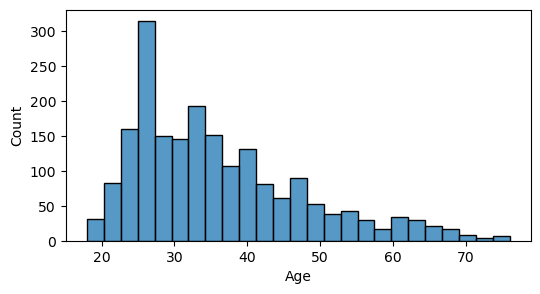

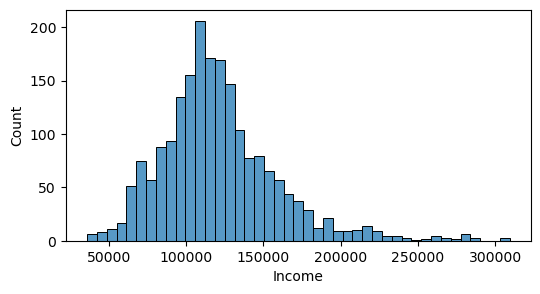

In [17]:
for num in num_col:
    plt.figure(figsize=(6,3))
    sns.histplot(data = customer_info, x = num)

### Categorical variable distribution

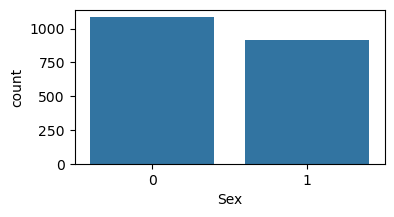

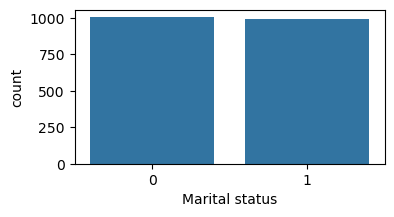

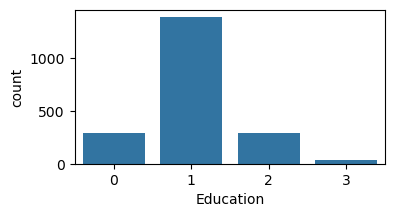

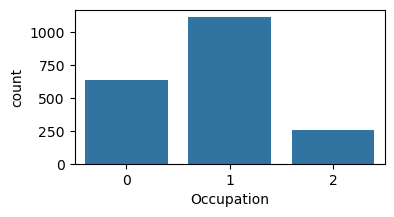

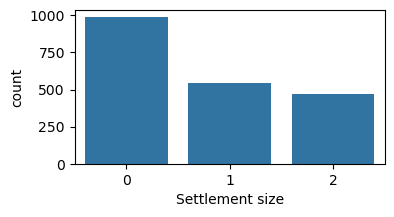

In [19]:
for cat in cat_col:
    plt.figure(figsize = (4, 2))
    sns.countplot(data = customer_info, x = cat)

### Bivariate analysis (between 2 variables)

#### Between numeric variables

<Axes: xlabel='Age', ylabel='Income'>

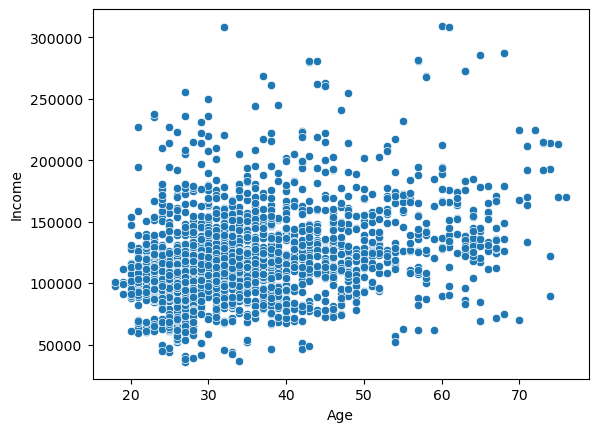

In [22]:
sns.scatterplot(x = 'Age', y = 'Income', data = customer_info)

Calculate the correlation between two numeric variables

In [24]:
stats.pearsonr(customer_info['Age'], customer_info['Income'])

PearsonRResult(statistic=0.34061016373173525, pvalue=1.6443825442386605e-55)

In [25]:
df['Age'].corr(df['Income'])

0.34061016373173514

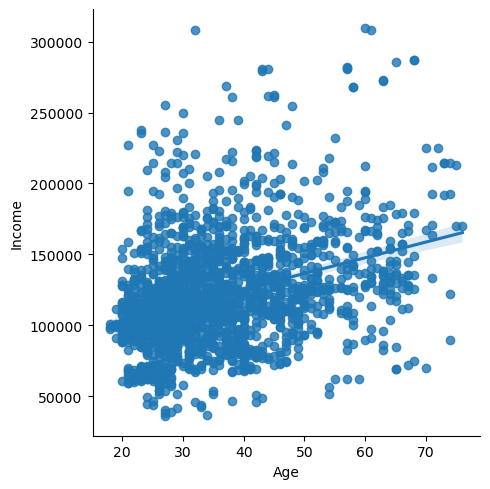

In [26]:
sns.lmplot(x = 'Age', y = 'Income', data = customer_info)

#### Between categorical and nominal columns

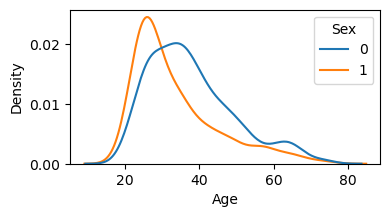

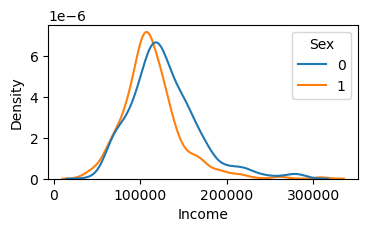

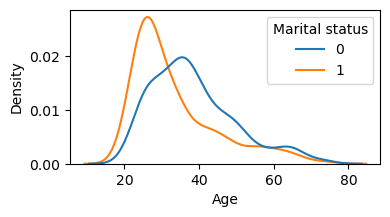

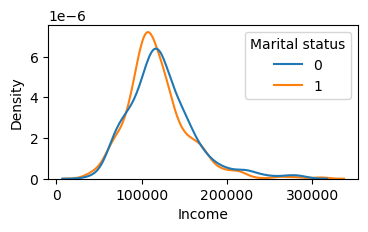

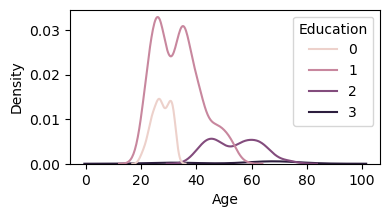

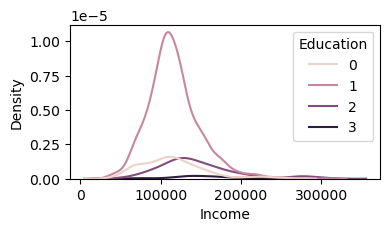

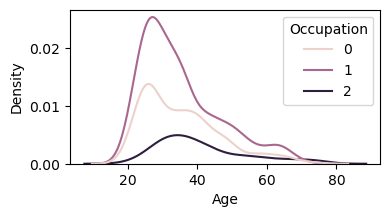

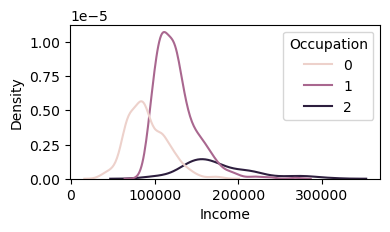

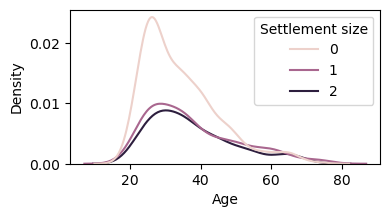

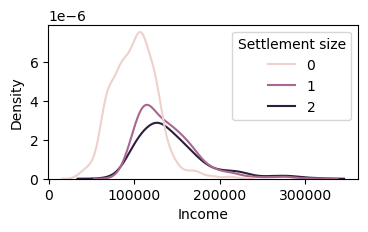

In [28]:
for cat in cat_col:
    for num in num_col:
        plt.figure(figsize = (4, 2))
        sns.kdeplot(data = customer_info, x = num, hue = cat)

#### Between categorical columns

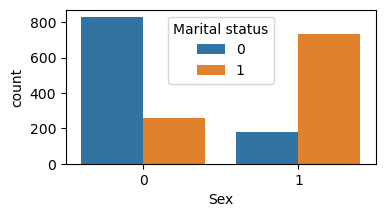

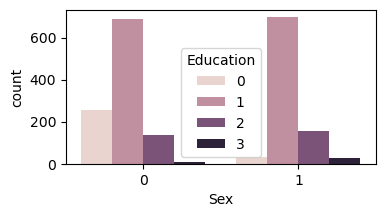

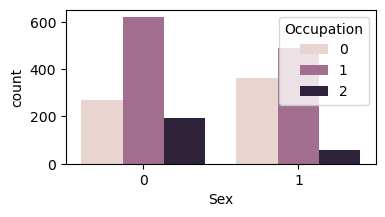

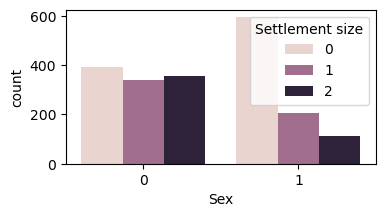

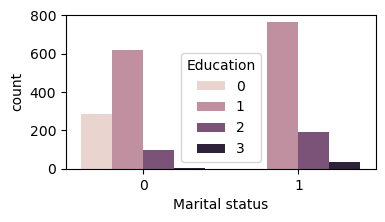

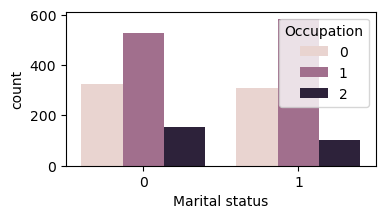

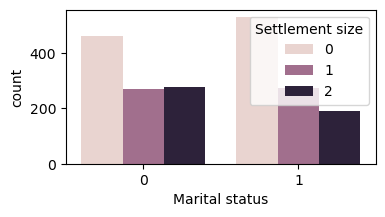

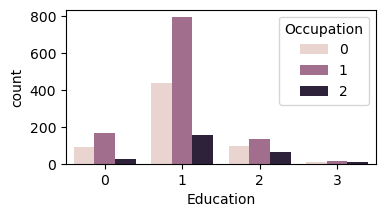

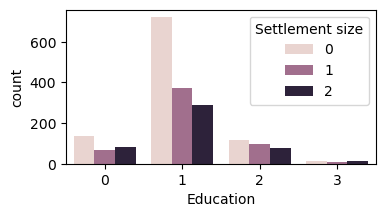

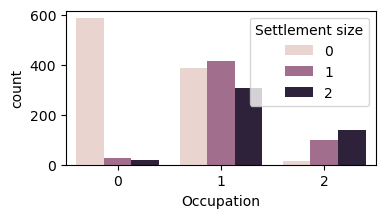

In [30]:
cat_aux = cat_col.copy()

for category1 in cat_col:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(4,2))
            sns.countplot(data=customer_info, x=category1, hue=category2)

### Multivariate Analysis

In [32]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)

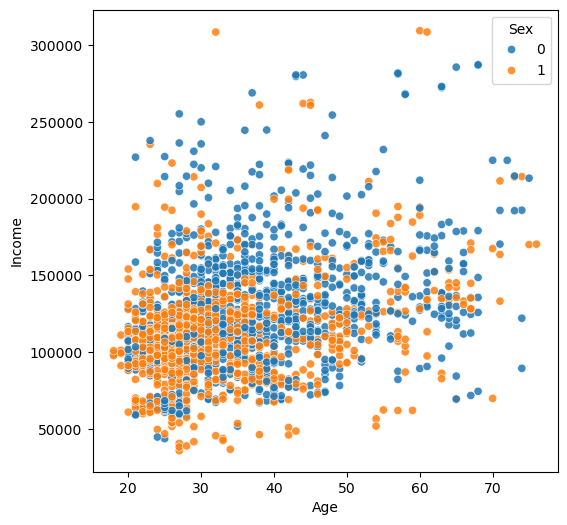

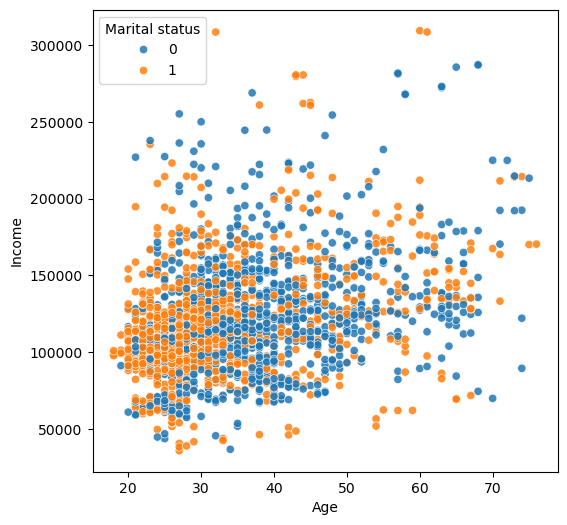

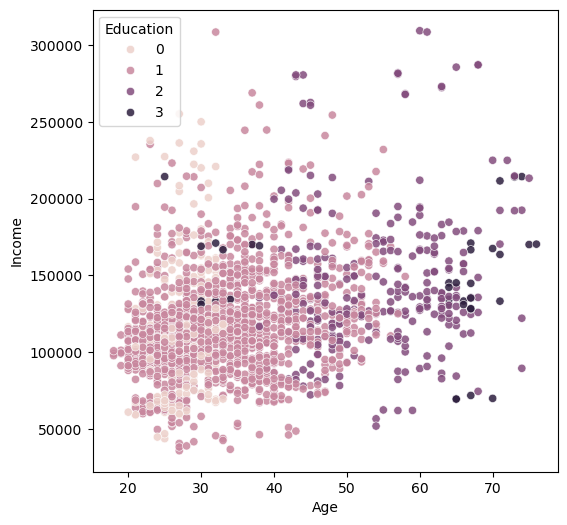

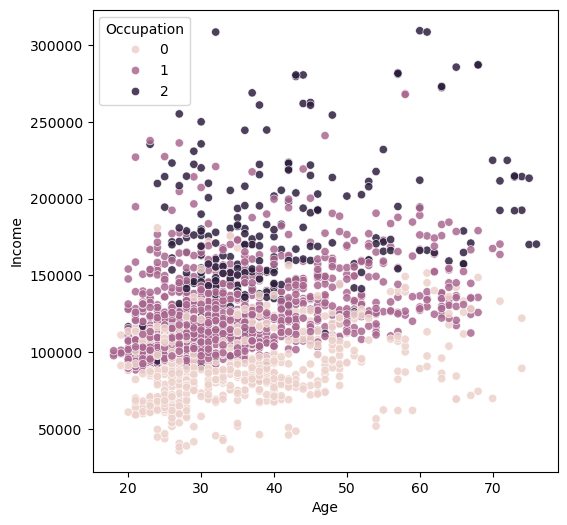

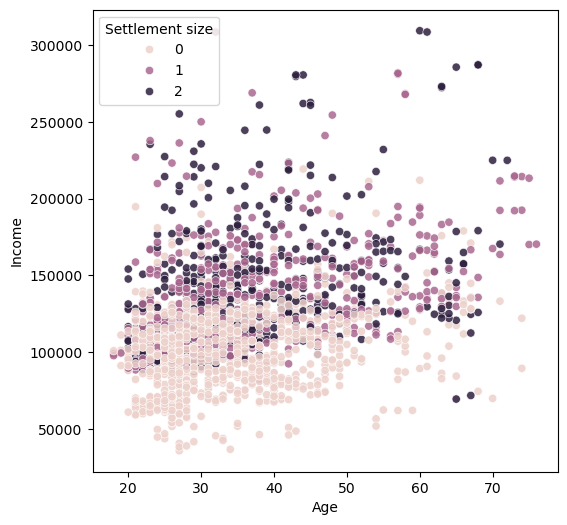

In [33]:
for cat in cat_col:
    bivariate_scatter('Age', 'Income', cat, customer_info)

## Data Pre-processing

Retrieve original data that has a numeric data type

In [36]:
df = customer_info.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


### Remove outlier

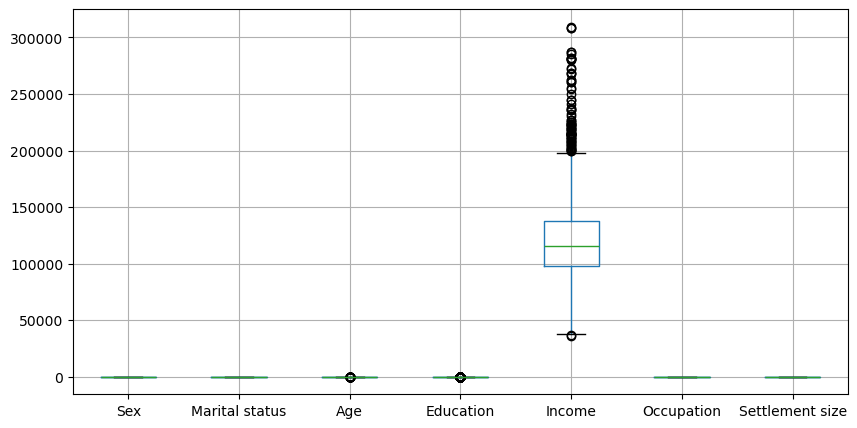

In [38]:
df.boxplot(figsize=(10, 5))
plt.show()

In [39]:
df.shape

(2000, 7)

In [40]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Get numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove outliers from numeric columns
df = remove_outliers_iqr(df.copy(), numeric_cols)

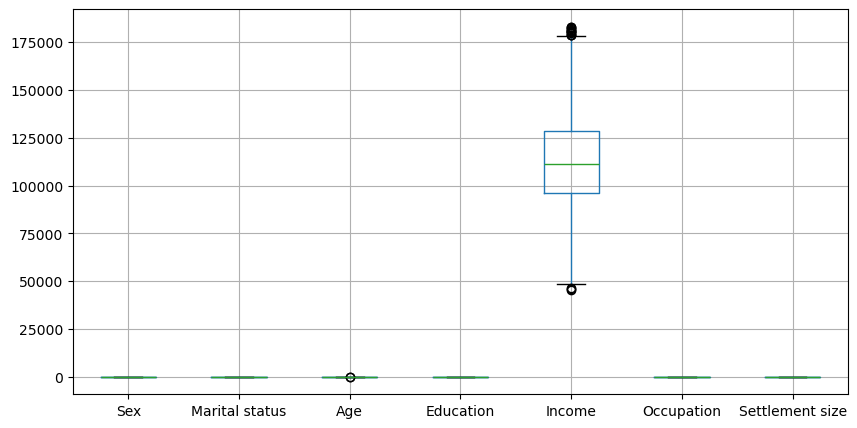

In [41]:
df.boxplot(figsize=(10, 5))
plt.show()

In [42]:
df.shape

(1332, 7)

### Scaling

In [44]:
df_cp = df.copy()

In [45]:
scaler = MinMaxScaler()

X = scaler.fit_transform(df_cp)

In [46]:
X

array([[1.        , 1.        , 0.1       , ..., 0.76486714, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.775     , ..., 0.31719484, 0.        ,
        0.        ],
       [0.        , 0.        , 0.675     , ..., 0.9160619 , 0.5       ,
        0.5       ],
       ...,
       [1.        , 0.        , 0.725     , ..., 0.56672581, 0.        ,
        0.        ],
       [1.        , 1.        , 0.225     , ..., 0.52468768, 0.5       ,
        0.        ],
       [1.        , 1.        , 0.15      , ..., 0.38088105, 0.        ,
        0.        ]])

In [47]:
pd.DataFrame(X).describe()

0            1            2       3            4  \
count  1332.000000  1332.000000  1332.000000  1332.0  1332.000000   
mean      0.509009     0.559309     0.379824     0.0     0.493746   
std       0.500107     0.496656     0.208733     0.0     0.195075   
min       0.000000     0.000000     0.000000     0.0     0.000000   
25%       0.000000     0.000000     0.200000     0.0     0.365939   
50%       1.000000     1.000000     0.375000     0.0     0.478076   
75%       1.000000     1.000000     0.500000     0.0     0.604954   
max       1.000000     1.000000     1.000000     0.0     1.000000   

                 5            6  
count  1332.000000  1332.000000  
mean      0.384760     0.332958  
std       0.299713     0.393966  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.500000     0.000000  
75%       0.500000     0.500000  
max       1.000000     1.000000

## Clustering Model

### Determining the optimal number of clusters with the elbow method

Elbow method, to find how many clusters will be used to divide the dataset.

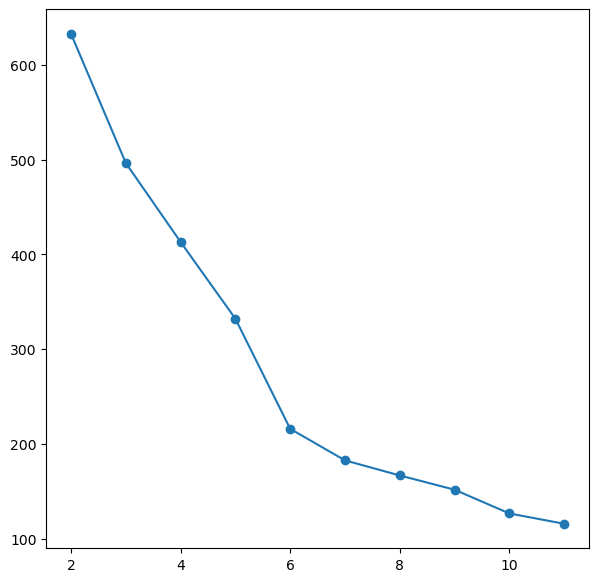

In [51]:
clusters_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
inertia = []

for c in clusters_range:
    kmeans = KMeans(n_clusters = c, random_state = 42).fit(X) # Training clustering into c clusters with Kmeans
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (7, 7))
plt.plot(clusters_range, inertia, marker = 'o')

From the elbow method above, we will roughly divide the customers into 6 or 7 groups

### Determine the number of clusters with the silhouette score method

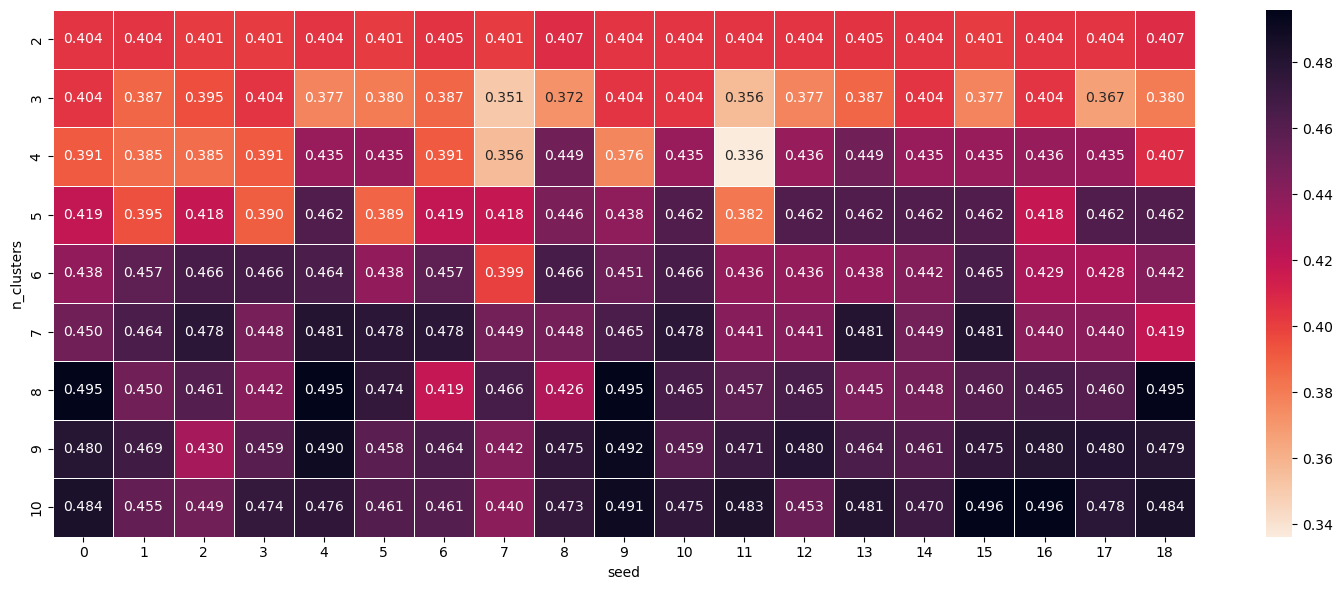

In [54]:
clusters_range=range(2, 11)
random_range  =range(0, 19)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters = c, random_state = r)
        cluster_labels = clusterer.fit_predict(X)
        sillhouette_avg = silhouette_score(X, cluster_labels)
        results.append([c, r, sillhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

From the results of the elbow method and silhouette score, we decided to divide the customer dataset into 6 groups/cluster.

## Run the clustering algorithm to divide the dataset into 6 groups

In [57]:
pd.DataFrame(X, columns = df_cp.columns)

Sex  Marital status    Age  Education    Income  Occupation  \
0     1.0             1.0  0.100        0.0  0.764867         0.5   
1     0.0             0.0  0.775        0.0  0.317195         0.0   
2     0.0             0.0  0.675        0.0  0.916062         0.5   
3     0.0             0.0  0.875        0.0  0.752200         0.5   
4     0.0             0.0  0.425        0.0  0.721782         0.0   
...   ...             ...    ...        ...       ...         ...   
1327  1.0             0.0  0.500        0.0  0.305996         0.0   
1328  0.0             0.0  0.675        0.0  0.493201         0.5   
1329  1.0             0.0  0.725        0.0  0.566726         0.0   
1330  1.0             1.0  0.225        0.0  0.524688         0.5   
1331  1.0             1.0  0.150        0.0  0.380881         0.0   

      Settlement size  
0                 1.0  
1                 0.0  
2                 0.5  
3                 0.5  
4                 0.0  
...               ...  
1327              0.0  
1328              0.0  
1329              0.0  
1330              0.0  
1331              0.0  

[1332 rows x 7 columns]

Dimensionality reduction of our training dataset, from 7 dimensions to 3 dimensions using PCA (Principal Component Analysis) algorithm.

In [59]:
pca = PCA(n_components=3, random_state=42)

X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])
X_pca_df

X1        X2        X3
0    -0.449744  0.784904  0.326481
1     0.624419 -0.724546 -0.220971
2     0.869208  0.007058  0.101996
3     0.894477 -0.053100  0.099168
4     0.593938 -0.592811 -0.199369
...        ...       ...       ...
1327 -0.111707 -0.768105  0.479444
1328  0.689507 -0.437763 -0.091290
1329 -0.031385 -0.735841  0.539164
1330 -0.710808  0.016636  0.038195
1331 -0.810969 -0.242475 -0.104725

[1332 rows x 3 columns]

Run the KMeans clustering algorithm for our 3-dimensional dataset.

In [61]:
kmeans=KMeans(n_clusters=6, random_state=0).fit(X)
labels = kmeans.labels_

X_pca_df['Labels'] = labels
X_pca_df['Labels'] = X_pca_df['Labels'].astype(str)
X_pca_df

X1        X2        X3 Labels
0    -0.449744  0.784904  0.326481      3
1     0.624419 -0.724546 -0.220971      5
2     0.869208  0.007058  0.101996      0
3     0.894477 -0.053100  0.099168      0
4     0.593938 -0.592811 -0.199369      5
...        ...       ...       ...    ...
1327 -0.111707 -0.768105  0.479444      4
1328  0.689507 -0.437763 -0.091290      5
1329 -0.031385 -0.735841  0.539164      4
1330 -0.710808  0.016636  0.038195      3
1331 -0.810969 -0.242475 -0.104725      1

[1332 rows x 4 columns]

In [62]:
X_pca_df['Labels'].value_counts()

Labels
3    372
0    277
2    194
5    183
1    179
4    127
Name: count, dtype: int64

## Visualization of clustering results

In [64]:
fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Labels'])
fig.show()

In [65]:
results_df = df.copy()

results_df['Labels'] = kmeans.labels_
results_df

Sex  Marital status  Age  Education  Income  Occupation  \
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
5       0               0   35          1  144848           0   
...   ...             ...  ...        ...     ...         ...   
1993    1               0   38          1   87670           0   
1994    0               0   45          1  113414           1   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1998    1               1   24          1   97968           0   

      Settlement size  Labels  
1                   2       3  
2                   0       5  
3                   1       0  
4                   1       0  
5                   0       5  
...               ...     ...  
1993                0       4  
1994                0       5  
1995                0       4  
1996                0       3  
1998                0       1  

[1332 rows x 8 columns]

Describe method provides general statistics about the data

In [67]:
summary = {}

for index in range(6):
   summary[index] = results_df[results_df['Labels'] == index].describe().T

Cluster 0

In [69]:
summary[0]

count           mean           std      min       25%  \
Sex              277.0       0.000000      0.000000      0.0       0.0   
Marital status   277.0       0.000000      0.000000      0.0       0.0   
Age              277.0      41.324910      6.612668     30.0      36.0   
Education        277.0       1.000000      0.000000      1.0       1.0   
Income           277.0  135750.007220  21430.839752  82398.0  118656.0   
Occupation       277.0       1.252708      0.475145      0.0       1.0   
Settlement size  277.0       1.505415      0.522126      0.0       1.0   
Labels           277.0       0.000000      0.000000      0.0       0.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        0.0       0.0       0.0  
Age                  40.0      47.0      58.0  
Education             1.0       1.0       1.0  
Income           134794.0  151781.0  183108.0  
Occupation            1.0       2.0       2.0  
Settlement size       2.0       2.0       2.0  
Labels                0.0       0.0       0.0

Cluster 1

In [71]:
summary[1]

count          mean           std      min      25%      50%  \
Sex              179.0      1.000000      0.000000      1.0      1.0      1.0   
Marital status   179.0      1.000000      0.000000      1.0      1.0      1.0   
Age              179.0     27.977654      5.387204     19.0     24.0     26.0   
Education        179.0      1.000000      0.000000      1.0      1.0      1.0   
Income           179.0  87765.586592  20962.319645  46109.0  70806.0  87227.0   
Occupation       179.0      0.000000      0.000000      0.0      0.0      0.0   
Settlement size  179.0      0.000000      0.000000      0.0      0.0      0.0   
Labels           179.0      1.000000      0.000000      1.0      1.0      1.0   

                     75%       max  
Sex                  1.0       1.0  
Marital status       1.0       1.0  
Age                 32.0      43.0  
Education            1.0       1.0  
Income           99828.0  181003.0  
Occupation           0.0       0.0  
Settlement size      0.0       0.0  
Labels               1.0       1.0

Cluster 2

In [73]:
summary[2]

count           mean           std      min       25%  \
Sex              194.0       0.000000      0.000000      0.0      0.00   
Marital status   194.0       1.000000      0.000000      1.0      1.00   
Age              194.0      29.113402      5.558686     18.0     25.00   
Education        194.0       1.000000      0.000000      1.0      1.00   
Income           194.0  113414.257732  29763.452900  62263.0  94551.00   
Occupation       194.0       0.881443      0.611942      0.0      0.25   
Settlement size  194.0       0.855670      0.839315      0.0      0.00   
Labels           194.0       2.000000      0.000000      2.0      2.00   

                      50%        75%       max  
Sex                   0.0       0.00       0.0  
Marital status        1.0       1.00       1.0  
Age                  28.0      33.00      42.0  
Education             1.0       1.00       1.0  
Income           109166.5  129653.25  180940.0  
Occupation            1.0       1.00       2.0  
Settlement size       1.0       2.00       2.0  
Labels                2.0       2.00       2.0

Cluster 3

In [75]:
summary[3]

count           mean           std      min       25%  \
Sex              372.0       1.000000      0.000000      1.0       1.0   
Marital status   372.0       1.000000      0.000000      1.0       1.0   
Age              372.0      27.704301      4.712624     18.0      24.0   
Education        372.0       1.000000      0.000000      1.0       1.0   
Income           372.0  117808.978495  18965.405362  88800.0  103476.0   
Occupation       372.0       1.045699      0.221628      0.0       1.0   
Settlement size  372.0       0.739247      0.740996      0.0       0.0   
Labels           372.0       3.000000      0.000000      3.0       3.0   

                      50%        75%       max  
Sex                   1.0       1.00       1.0  
Marital status        1.0       1.00       1.0  
Age                  27.0      31.00      42.0  
Education             1.0       1.00       1.0  
Income           113196.5  127251.25  178991.0  
Occupation            1.0       1.00       2.0  
Settlement size       1.0       1.00       2.0  
Labels                3.0       3.00       3.0

Cluster 4

In [77]:
summary[4]

count          mean           std      min      25%  \
Sex              127.0      1.000000      0.000000      1.0      1.0   
Marital status   127.0      0.000000      0.000000      0.0      0.0   
Age              127.0     34.779528      8.076925     19.0     28.0   
Education        127.0      1.000000      0.000000      1.0      1.0   
Income           127.0  99626.590551  20403.394727  45590.0  84018.0   
Occupation       127.0      0.433071      0.528408      0.0      0.0   
Settlement size  127.0      0.094488      0.293665      0.0      0.0   
Labels           127.0      4.000000      0.000000      4.0      4.0   

                      50%       75%       max  
Sex                   1.0       1.0       1.0  
Marital status        0.0       0.0       0.0  
Age                  35.0      40.0      52.0  
Education             1.0       1.0       1.0  
Income           101948.0  113344.0  143321.0  
Occupation            0.0       1.0       2.0  
Settlement size       0.0       0.0       1.0  
Labels                4.0       4.0       4.0

Cluster 5

In [79]:
summary[5]

count           mean           std      min      25%  \
Sex              183.0       0.000000      0.000000      0.0      0.0   
Marital status   183.0       0.000000      0.000000      0.0      0.0   
Age              183.0      40.366120      5.630797     29.0     36.0   
Education        183.0       1.000000      0.000000      1.0      1.0   
Income           183.0  105871.967213  23244.008385  51791.0  87293.5   
Occupation       183.0       0.344262      0.476431      0.0      0.0   
Settlement size  183.0       0.092896      0.291083      0.0      0.0   
Labels           183.0       5.000000      0.000000      5.0      5.0   

                      50%       75%       max  
Sex                   0.0       0.0       0.0  
Marital status        0.0       0.0       0.0  
Age                  39.0      43.5      54.0  
Education             1.0       1.0       1.0  
Income           105519.0  121911.0  175800.0  
Occupation            0.0       1.0       1.0  
Settlement size       0.0       0.0       1.0  
Labels                5.0       5.0       5.0

Cluster 0: Single males with an average mature age, average high school education, average high salary, average skilled employee / official worker, average living in a big city.
<br>
<br>
Cluster 1: Non-single females with an average young age, average high school education, average small salary, average not working, average living in a small city.
<br>
<br>
Cluster 2: Non-single males with an average young age, average high school education, average medium salary, average skilled employee / official worker, average living in a mid-sized city.
<br>
<br>
Cluster 3: Non-single females with an average young age, average high school education, average medium salary, average skilled employee / official worker, average living in a mid-sized city.
<br>
<br>
Cluster 4: Single females with an average mature age, average high school education, average small salary, average not working, average living in a small city.
<br>
<br>
Cluster 5: Single males with an average mature age, average high school education, average medium salary, average not working, average living in a small city.

In [81]:
results_df

Sex  Marital status  Age  Education  Income  Occupation  \
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
5       0               0   35          1  144848           0   
...   ...             ...  ...        ...     ...         ...   
1993    1               0   38          1   87670           0   
1994    0               0   45          1  113414           1   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1998    1               1   24          1   97968           0   

      Settlement size  Labels  
1                   2       3  
2                   0       5  
3                   1       0  
4                   1       0  
5                   0       5  
...               ...     ...  
1993                0       4  
1994                0       5  
1995                0       4  
1996                0       3  
1998                0       1  

[1332 rows x 8 columns]

# Classification

In [83]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import pickle

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Exploratory Data Analysis

In [85]:
results_df

Sex  Marital status  Age  Education  Income  Occupation  \
1       1               1   22          1  150773           1   
2       0               0   49          1   89210           0   
3       0               0   45          1  171565           1   
4       0               0   53          1  149031           1   
5       0               0   35          1  144848           0   
...   ...             ...  ...        ...     ...         ...   
1993    1               0   38          1   87670           0   
1994    0               0   45          1  113414           1   
1995    1               0   47          1  123525           0   
1996    1               1   27          1  117744           1   
1998    1               1   24          1   97968           0   

      Settlement size  Labels  
1                   2       3  
2                   0       5  
3                   1       0  
4                   1       0  
5                   0       5  
...               ...     ...  
1993                0       4  
1994                0       5  
1995                0       4  
1996                0       3  
1998                0       1  

[1332 rows x 8 columns]

In [86]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 1 to 1998
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              1332 non-null   int64
 1   Marital status   1332 non-null   int64
 2   Age              1332 non-null   int64
 3   Education        1332 non-null   int64
 4   Income           1332 non-null   int64
 5   Occupation       1332 non-null   int64
 6   Settlement size  1332 non-null   int64
 7   Labels           1332 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 88.5 KB


In [87]:
results_df.describe()

Sex  Marital status          Age  Education         Income  \
count  1332.000000     1332.000000  1332.000000     1332.0    1332.000000   
mean      0.509009        0.559309    33.192943        1.0  113488.922673   
std       0.500107        0.496656     8.349315        0.0   26826.319037   
min       0.000000        0.000000    18.000000        1.0   45590.000000   
25%       0.000000        0.000000    26.000000        1.0   95913.250000   
50%       1.000000        1.000000    33.000000        1.0  111334.000000   
75%       1.000000        1.000000    38.000000        1.0  128782.000000   
max       1.000000        1.000000    58.000000        1.0  183108.000000   

        Occupation  Settlement size       Labels  
count  1332.000000      1332.000000  1332.000000  
mean      0.769520         0.665916     2.331832  
std       0.599425         0.787931     1.659916  
min       0.000000         0.000000     0.000000  
25%       0.000000         0.000000     1.000000  
50%       1.000000         0.000000     3.000000  
75%       1.000000         1.000000     3.000000  
max       2.000000         2.000000     5.000000

### Missing Value and Duplicated Value

In [89]:
results_df.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
Labels             0
dtype: int64

In [90]:
results_df.duplicated().sum()

0

### Outlier

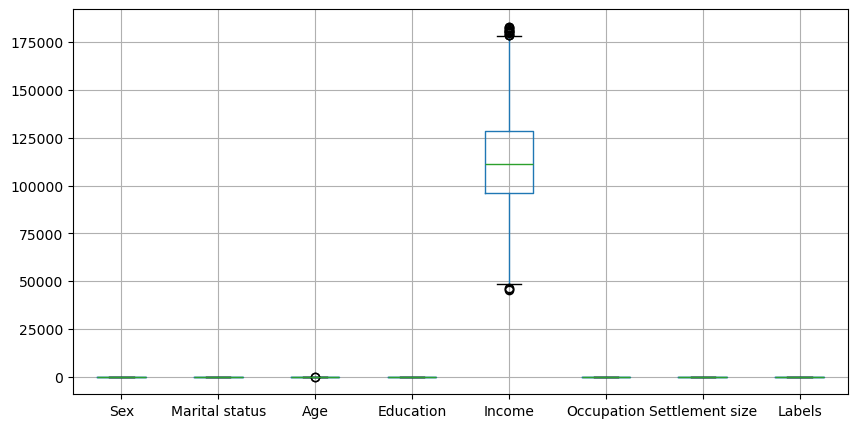

In [92]:
results_df.boxplot(figsize=(10, 5))
plt.show()

### Label Distribution

In [94]:
label = results_df['Labels']

label_counts = label.value_counts().sort_values(ascending=False)
label_counts

Labels
3    372
0    277
2    194
5    183
1    179
4    127
Name: count, dtype: int64

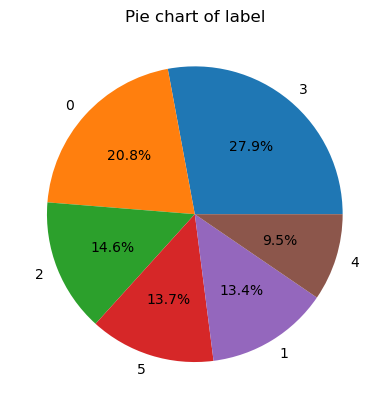

In [95]:
# create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# add title
plt.title('Pie chart of label')

# show the plot
plt.show()

## Data Pre-processing

In [97]:
results_df.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size  \
1    1               1   22          1  150773           1                2   
2    0               0   49          1   89210           0                0   
3    0               0   45          1  171565           1                1   
4    0               0   53          1  149031           1                1   
5    0               0   35          1  144848           0                0   

   Labels  
1       3  
2       5  
3       0  
4       0  
5       5

In [98]:
df_cp = results_df.copy()

### Split Data

In [100]:
X = df_cp.drop(columns='Labels')
y = df_cp['Labels']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1065, 7)
(267, 7)
(1065,)
(267,)


### Scalling

In [103]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
X_train

array([[1.        , 1.        , 0.2       , ..., 0.2960776 , 0.        ,
        0.        ],
       [1.        , 1.        , 0.375     , ..., 0.54542678, 0.5       ,
        0.        ],
       [1.        , 0.        , 0.575     , ..., 0.49397897, 0.5       ,
        0.        ],
       ...,
       [1.        , 1.        , 0.475     , ..., 0.44953388, 0.5       ,
        0.        ],
       [1.        , 1.        , 0.45      , ..., 0.6087494 , 0.        ,
        0.        ],
       [1.        , 0.        , 0.725     , ..., 0.47046205, 0.5       ,
        0.        ]])

In [105]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## Classification Modelling

In [107]:
def classification_eval(actual, predict, name):

  cm = confusion_matrix(actual, predict)
  # plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['0', '1', '2', '3', '4', '5'],
              yticklabels=['0', '1', '2', '3', '4', '5'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Lables')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  print(classification_report(actual, predict))

In [108]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    results.append({'Model': model_name, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test})

df_accuracy = pd.DataFrame(results).sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending=[False, False])
df_accuracy

Model  Train Accuracy  Test Accuracy
1     Logistic Regression        1.000000       1.000000
2                    K-NN        1.000000       1.000000
4           Random Forest        1.000000       1.000000
3           Decision Tree        1.000000       0.996255
5  Support Vector Machine        0.999061       1.000000
0             Naive Bayes        0.774648       0.775281

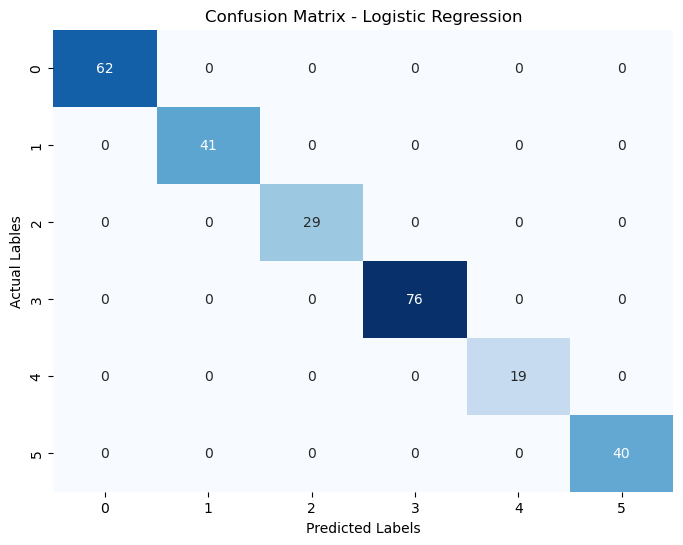

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        40

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [109]:
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)

classification_eval(y_test, y_pred_test, 'Logistic Regression')

In [110]:
pickle.dump(model, open('model_lr.pkl', 'wb'))